## Coding Exercise #0608

In [1]:
# Instalar WordCloud una única vez.
!pip install wordcloud

In [15]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Andrea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andrea\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [2]:
from wordcloud import WordCloud
import numpy as np
import nltk
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         # Desde la biblioteca de Pillow, importe el módulo Image.
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline

### 1. Visualizar los datos de texto como  un WordCloud:

In [7]:
# Ir al directorio dónde se encuentra el fichero. 
os.chdir(r'./')                # Reemplazar con la ruta adecuada.   

In [10]:
f = open("./book_three_little_pigs.txt",'r',encoding='UTF8')
my_book = f.readlines()
f.close()

#### 1.1. Preprocesado:

In [16]:
n_min = 4                                                           # Número mínimo de caracteres. 
corpus = []
lemmatizer = WordNetLemmatizer()
for a_line in my_book:
    pre = re.sub(r'\W', ' ', a_line)                                # Sustituya el carácter no alfanumérico por espacio.
    pre = re.sub(r'\d+','', pre)                                    # Elimina los números.
    pre = nltk.word_tokenize(pre)                                   # Tokenizar en palabras.
    pre = [x for x in pre if len(x) > n_min]                        # Longitud mínima.
    pre = [x.lower() for x in pre]                                  # Convertir en minúsculas.
    pre = [x for x in pre if x not in stopwords.words('english')]   # Eliminar palabras vacias.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # Lemmatizar.
    corpus += pre                                                   # De vuelta al corpus.

In [17]:
len(corpus)

184

#### 1.2. Generar un wordcloud básico:

In [18]:
# WordCloud requires that the imput data be a single long string.
a_long_sentence = ' '.join(corpus)

In [19]:
wc = WordCloud(background_color='white', max_words=30)              # Personalizar la salida.
wc.generate(a_long_sentence)
# wc.words_                                                         # Verificar las palabras de mayor rango.                                                         

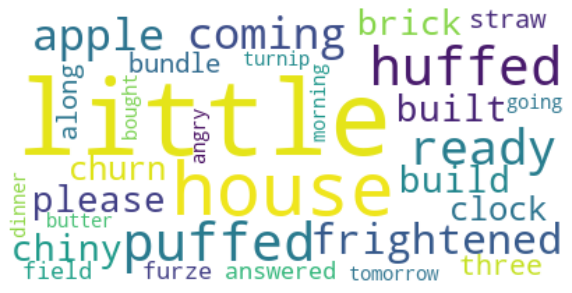

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Desactivar los ejes.
plt.show()

#### 1.3. Generar un wordcloud usando una máscara:

In [21]:
# Pick a background mask.
#img = Image.open('background_1.png')                   # Elipse.
#img = Image.open('background_2.png')                   # Burbuja de diálogo.
#img = Image.open('background_3.png')                   # Corazón.
img = Image.open('background_4.png')                    # Círculo.
back_mask = np.array(img)

FileNotFoundError: [Errno 2] No such file or directory: 'background_4.png'

In [ ]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # Personalizar la salida. 
wc.generate(a_long_sentence) 

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Desactivar los ejes.
plt.savefig("out.png")                             # Salvar en un fichero externo.  
plt.show()